<img src="images/header.png">

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Линейные модели (практика)</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

In [2]:
try:
    from ipywidgets import interact, IntSlider, fixed
except ImportError:
    print u'Так надо'

# Линейная регрессия

## Пример: Стоимость автомобиля

Загрузите [тренировочные данные](http://bit.ly/1gIQs6C) и [тестовые данные](http://bit.ly/IYPHrK) - уже знакомые нам данные по автомобилям.

In [3]:
df_train = pd.read_csv('http://bit.ly/1gIQs6C')
df_test = pd.read_csv('http://bit.ly/IYPHrK')

In [4]:
df_train.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


/home/lexa/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


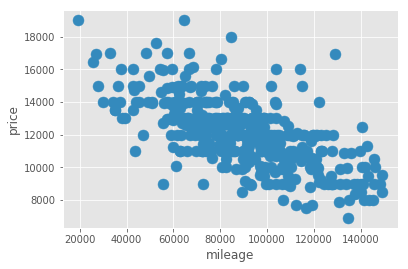

In [5]:
df_train.plot(x='mileage', y='price', kind='scatter', s=120)

Кажется, что между стоимостью и пробегом зависимость линейная - давайте ее найдем!

In [6]:
X_train = df_train.mileage.values.reshape(-1, 1)
y_train = df_train.price.values

In [7]:
from sklearn.linear_model import LinearRegression

Обучим модель

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print 'Модель:\nprice = %.2f + (%.2f)*mileage' % (model.intercept_, model.coef_[0])

Модель:
price = 16762.02 + (-0.05)*mileage


In [10]:
model.predict

<bound method LinearRegression.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

Нарисуйте предсказание модели (прямую) вместе с данными на плоскости. Здесь можно либо явно взять уравнение прямой и посчитать значения в каждой точке, либо через predict.

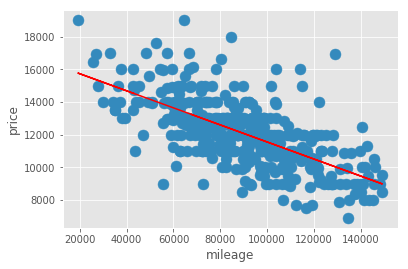

In [11]:
df_train.plot(x='mileage', y='price', kind='scatter', s=120)
plt.plot(X_train, model.predict(X_train),'-r' )
## Your Code Here

### Меры качества

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Можно посчитать простые варианты агрегирования остатков, например:

* $\frac{1}{n} \sum_i |\hat{y}^{(i)}-y^{(i)}|$ - средняя абсолютная ошибка
* $\frac{1}{n} \sum_i (\hat{y}^{(i)}-y^{(i)})^2$ - средняя квадратичная ошибка

In [13]:
y_hat = model.predict(X_train)

In [14]:
print('Средняя абсолютная ошибка %.2f' % mean_absolute_error(y_train, y_hat))
print('Средняя квадратичная ошибка %.2f' % mean_squared_error(y_train, y_hat))

Средняя абсолютная ошибка 1182.21
Средняя квадратичная ошибка 2412292.55


Можно рассмотреть более сложную меру: коэффициент детерминации $R^2$:

* $TSS = \sum_i (y^{(i)}-\bar{y})^2$ - общая сумма квадратов (total sum of squares)
* $RSS = \sum_i (\hat{y}^{(i)}-y^{(i)})^2$ - сумма квадратов остатков (residual sum of squares)
* $ESS = \sum_i (\hat{y}^{(i)}-\bar{y})^2$ - объясненная сумма квадратов (explained sum of squares)

Для простоты будем считать, что
$$TSS = ESS + RSS$$

Тогда Коэффициент детерминации $R^2=1-\frac{RSS}{TSS}$

Рассчитайте его для нашей модели


## Преобразование переменных

### Нормализация

Переход к близким или единым шкалам улучшает сходимость градиентного спуска, уменьшает риск переполнения разрядности чисел, однако приходится жертвовать прямой интерпретируемостью..

Нормализацию обычно проделывают для вещественных признаков.

Нормализация z-score:
1. Вычитаем среднее: $x - \bar{x}$
2. Делим на стандартное отклонение: $\frac{x - \bar{x}}{std(x)}$

Можно проделать вручную, можно с помошью метода ниже

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print('Модель:\nprice = %.2f + (%.2f)*mileage`' % (model.intercept_, model.coef_[0]))

Модель:
price = 12084.24 + (-1351.67)*mileage`


## Как обучать линейную регрессию?
Попробуем разобраться без всяких `.predict()` и `.fit()`

### Рассмотрим случай с одним признаком и свободным членом

$X$ - признаковое описание наблюдений,<br\> $y$ - прогнозируемая величина

Пусть задана функция ошибки (функция потерь) $L(\cdot)$. <br\>
Нам надо построить такой функционал $f(X)$, который будет выдавать значение наиболее близкие к $y$, иначе говоря: $$L\left(f(X) - y\right) \rightarrow\min $$

Определим функцию потерь, как сумму квадратов разности выдаваемого ответа функционала и реального значения: 
$$ L(\cdot) = \frac{1}{2n}\sum_{i=1}^n(f(x^{(i)}) - y^{(i)})^2$$

Так как среди всего множества моделей мы выбрали линейную регрессию, то $$f(X) = \beta_0 + \beta_1x_1$$
Подставляем это выражение в $L(\cdot)$ и находим $\beta_0$,
$\beta_1$!

$$ L(\beta_0,\beta_1) = \frac{1}{2n}\sum^{n}_{i=1}(f(x^{(i)})  - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})^2  \rightarrow \min\limits_{\beta_0, \beta_1} $$

Изобразим функцию потерь на трехмерном графике в зависимости от $\beta_0$ и $\beta_1$ для задачи с автомобилем

In [17]:
# для удобства добавим столбец из "1" в матрицу с признаком "пробег"
X_model = np.c_[np.ones(X_train.shape), X_train]
X_model.shape

(417, 2)

In [18]:
from mpl_toolkits import mplot3d

Text(0,0.5,u'beta_1')

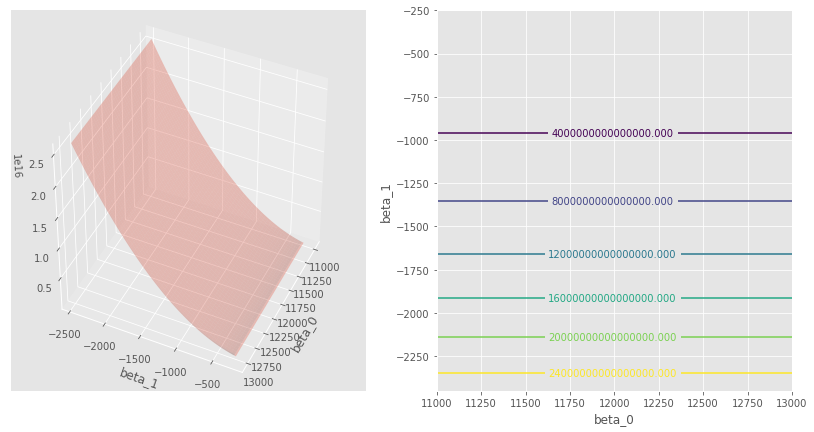

In [19]:
beta0 = np.linspace(11000 , 13000, 100)
beta1 = np.linspace(-2450, -250, 100)

B0, B1= np.meshgrid(beta0, beta1)

B_all = np.c_[B0.reshape(-1,1), B1.reshape(-1,1)].T

L = X_model.dot(B_all) - y_train.reshape(-1,1)
L = L ** 2
L = L.mean(axis=0)/2
L = L.reshape(B0.shape)


fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(40, 25)
ax.plot_surface(B0, B1, L, alpha=0.3,)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')

ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')

### Градиентный спуск

Градиентый спуск - это итеративный метод оптимизации функции. Он заключается в постепенном перемещении к точке экспетмума в направлении антиградиента этой функции в точке.

Посчитаем, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$

Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta -  \frac{\alpha}{n} \frac{\partial L}{\partial \beta}$$


Теперь к шагам алгоритма:

* Задаем случайное начальное значение для $\beta$
* Пока не будет достигнуто правило останова:
    * Считаем ошибку и значение функции потерь
    * Считаем градиент
    * Обновляем коэффициенты

In [20]:
def gradient_descent(X, y, iters, alpha):
    
    costs = []
    betas = []
    
    n = y.shape[0] 
    Beta = np.random.rand(X.shape[1])
    for i in xrange(iters):
        y_hat = X.dot(Beta)
        
        # считаем ошибку и значение функции потерь
        
        reshd = y_hat - y
        cost =(reshd**2).sum()
        
        # считаем градиент
        grad=X.T.dot(reshd)

        # обновляем коэффициенты
        Beta = Beta - alpha/n * grad
        betas.append(Beta)
        costs.append(cost)
                    
    return Beta, costs, betas

In [21]:
Beta, costs, betas = gradient_descent(X_model, y_train, 100, 0.05)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


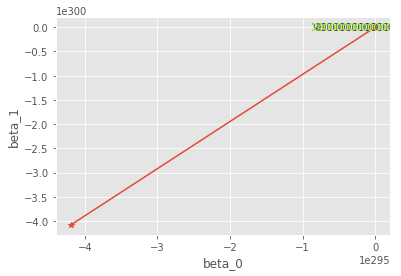

In [24]:
beta0 = np.linspace(11000 , 13000, 100)
beta1 = np.linspace(-2450, -250, 100)

B0, B1= np.meshgrid(beta0, beta1)

B_all = np.c_[B0.reshape(-1,1), B1.reshape(-1,1)].T

L = X_model.dot(B_all) - y_train.reshape(-1,1)
L = L ** 2
L = L.mean(axis=0)/2
L = L.reshape(B0.shape)

fig, ax = plt.subplots(1,1)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')

betas = np.array(betas)
ax.plot(betas[:,0], betas[:,1], marker='*')


# Логистическая регрессия

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

## Игрушечный пример

Сгенерируем выборку и опробуем логистическую регрессию

In [26]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

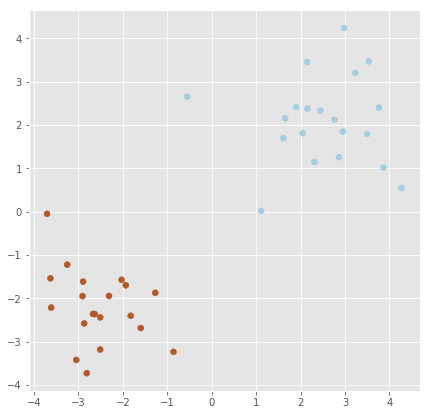

In [27]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

In [28]:
from sklearn.linear_model import LogisticRegression

Обучим логистическую регрессию на этих данных и нарисуем разделяющую гиперплоскость

In [29]:
model = LogisticRegression(C=1.0, 
                           fit_intercept=True, 
                           penalty='l2')
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
print 'w_0 = %f' % model.intercept_
print 'w_1, w_2 = ', model.coef_

w_0 = -0.183954
w_1, w_2 =  [[-1.06097157 -1.00171289]]


In [35]:
# Нарисуем эту гиперплоскость


In [36]:
y_hat = model.predict(X)
y_hat[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [37]:
y_hat_proba = model.predict_proba(X)
y_hat_proba[:10, :]

array([[9.98616528e-01, 1.38347180e-03],
       [9.99496019e-01, 5.03981209e-04],
       [9.95091160e-01, 4.90883960e-03],
       [9.94323473e-01, 5.67652674e-03],
       [9.90157090e-01, 9.84290974e-03],
       [9.97319087e-01, 2.68091305e-03],
       [9.94720579e-01, 5.27942062e-03],
       [9.94026880e-01, 5.97312006e-03],
       [9.96628393e-01, 3.37160720e-03],
       [9.77815343e-01, 2.21846572e-02]])

In [38]:
dec_func = model.decision_function(X)
dec_func[:10]

array([-6.58177471, -7.59246747, -5.31179677, -5.16572302, -4.61111223,
       -5.91891334, -5.23864551, -5.11449484, -5.68898843, -3.78591991])

### Как сделать нелинейную границу?

Рассмотрим набор данных, который в простонародье называют "Бублик".

In [31]:
from sklearn.datasets import make_circles

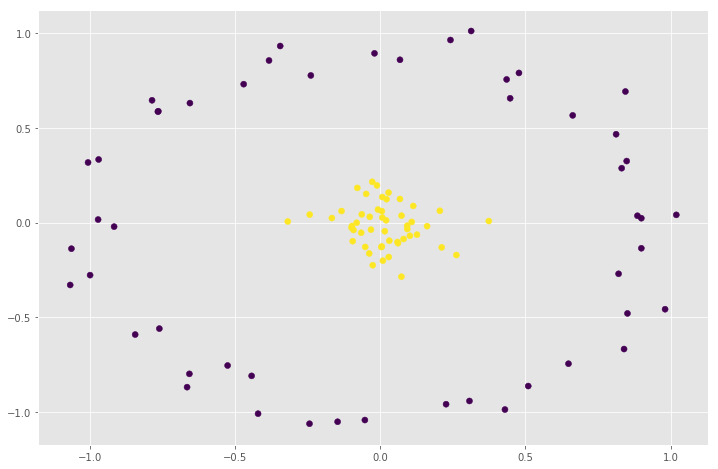

In [32]:
X, y = make_circles(n_samples=100, shuffle=True,
                    noise = 0.1,
                    factor=0.1)

plt.scatter(X[:, 0],
            X[:, 1],
            c=y)

Очевидно, что классы нельзя разделить линией. Но можно сделать это окружностью! </br>
Т.е. разделяющся линия теперь будет задаваться не уравнением прямой $g(x) = w_0 + w_1x_1 + w_2x_2$, а уравнением окружности. 

Выполните преобразование матрицы X, чтобы в ней были столбцы для $x_1$, $x_2$, $x^2_1$ + $x^2_2$ и обучите логистическую регрессию.

In [33]:
# Your code Here
X_new = np.c_[X,X[:,0]**2 + X[:,1]**2]
model = LogisticRegression(C=100000, 
                           fit_intercept=True)
model.fit(X_new, y)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [34]:
# Посчитаем количество ошибок
y_hat = model.predict(X_new)
(y != y_hat).sum()

0

In [35]:
# Нарисуем полученную окружность

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.1),
                       np.arange(-1.5, 1.5, 0.1))
xx0, xx1 = x0.ravel(), x1.ravel()

# Your code here

## Анализ тональности

Загрузите текстовые данные [отсюда](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/). Архив должен содержать 3 файла с положительными и отрицательными отзывами с ресурсов
* imdb.com
* amazon.com
* yelp.com

Формат файла следующий:
<отзыв>\t<метка>\n


### Задача
1. Загрузите тексты и метки классов в разные переменные
2. Выберите меру качества классификации
3. Обучите логистическую (без подбора гиперпараметров). Тексты представляются в виде мешка слов
4. Выведите наиболее значимые слова из текста

In [36]:
sent_data = pd.read_csv('sentiment/yelp_labelled.txt', sep='\t', names=['sentence', 'label'], header=None)

In [37]:
sent_data.head()

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [38]:
sent_data.shape

(1000, 2)

In [39]:
X = sent_data.sentence.values
y = sent_data.label.values

In [43]:
y[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
# Your Code Here

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
vect = CountVectorizer(max_df = 0.99,
                       min_df= 3,
                       ngram_range=(2,2),
                       stop_words='english')

In [85]:
vect.fit(X)
vect.transform(X)

<1000x51 sparse matrix of type '<type 'numpy.int64'>'
	with 198 stored elements in Compressed Sparse Row format>

In [86]:
words =vect.get_feature_names()
len(words)

51

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
model = Pipeline([
    ('vect', vect),
    ('clf', LogisticRegression())
])

In [89]:
model.fit(X,y)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.99, max_features=None, min_df=3,
        ngram_range=(2, 2), preprocessor=None, stop_words='english',
    ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [90]:
y_hat = model.predict_proba(X)

In [91]:
weights = model.steps[1][1].coef_
words = model.steps[0][1].get_feature_names()

In [92]:
coefs =pd.Series(index = words, data=weights[0])

In [93]:
coefs.sort_values()

10 minutes         -1.087160
waste time         -1.034520
bad food           -0.900206
zero stars         -0.873526
good way           -0.872600
service slow       -0.872600
wasn busy          -0.872600
ve better          -0.872600
food average       -0.872600
won going          -0.843087
30 minutes         -0.795505
20 minutes         -0.795505
just don           -0.794498
way overpriced     -0.786816
mediocre food      -0.786816
don think          -0.757226
anytime soon       -0.756788
minutes food       -0.692339
think ll           -0.553162
feel like          -0.542656
going anytime      -0.331145
like place         -0.327480
customer service   -0.324707
don know           -0.319732
hot dog            -0.278680
did like           -0.278680
recommend place     0.009291
good food           0.196686
definitely worth    0.294423
food service        0.308048
ve tried            0.341257
time came           0.372163
service food        0.405216
staff friendly      0.447587
service good  

# Sberbank DS Contest

В этом задании мы рассмотрим данные с предыдущего Sberbank Data Science Contest. К сожалению найти страницу с конкурсом уже не получается.

Одной из задач была опредление пола владельца карты по его транзакциям на карте. Зачем это нужно - одному сберу известно, но эта задача была хороша тем, что в ней можно нагенерировать много разных признаков

Есть такая [презентация](https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf) с предварительным анализом данных и идеями про признаки

Нам понадобятся файлы `customers_gender_train.csv`, `transactions.tsv.gz`, `mcc_types.tsv` и `trans_types.tsv`.

## Посмотрим на данные

Это метки ответов

In [94]:
df_gender = pd.read_csv('data/customers_gender_train.csv')
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


Это сами транзакции (отрицательные транзакции - списывание, положительные - зачисление на счет)

In [ ]:
df_transactions = pd.read_csv('data/transactions.csv.gz')
df_transactions.head()

Далее, расшифровки кодов [mcc](https://ru.wikipedia.org/wiki/Merchant_Category_Code) и транзакций

In [ ]:
df_tr = pd.read_csv('data/tr_types.csv', sep=';', encoding='utf8')
df_tr.head()

In [ ]:
df_mcc = pd.read_csv('data/tr_mcc_codes.csv', sep=';', encoding='utf8')
df_mcc.head()

Первое что мы видем - это странная дата и суммы в транзакциях. 

В принципе, посмотрев на исходное распределение "относительных" дат по какой-нибудь гендерной группы mcc, становится примерно понятно, что за даты закодированы.

Ну а суммы транзакций организаторы просто умножили на $\pi^{\exp}$ =)

Преобразование будет проделано ниже, но при желании, можете сами со всем разобраться.

In [ ]:
from pandas import Timestamp, DateOffset

In [ ]:
def preproc_transactions(df_transactions):
    sec_per_day = 86400
    sec_per_hour = 3600
    
    start_date = 1420070400 - 154 * sec_per_day - 3 * sec_per_hour
    
    df_transactions.loc[:, 'day'] = df_transactions.tr_datetime\
                                               .str.split(' ')\
                                               .str.get(0)\
                                               .astype(int)
    df_transactions.loc[:, 'time_raw'] = df_transactions.tr_datetime\
                                                    .str.split(' ')\
                                                    .str.get(1)

    # set temp dt
    df_transactions.loc[:, 'dt_temp'] = pd.to_datetime(df_transactions.loc[:, 'time_raw'], 
                                                    format='%H:%M:%S')\
                                        + DateOffset(years=115)
    
    df_transactions = df_transactions.assign(dt = lambda x: x.dt_temp.astype(np.int64) // 10**9
                                             + (x.day - 153) * sec_per_day)\
                                     .assign(weekday = lambda x: ((x.day + 4) % 7 + 1))
        
    df_transactions.loc[:, 'datetime'] = pd.to_datetime(df_transactions.dt, unit='s')
    df_transactions.loc[:, 'date'] = df_transactions.loc[:, 'datetime'].dt.strftime('%Y-%m-%d')
    df_transactions.loc[:, 'hour'] = df_transactions.loc[:, 'datetime'].dt.strftime('%H')
    
    df_transactions = df_transactions.drop(['dt_temp', 'time_raw', 'tr_datetime'], axis=1)
    
    df_transactions.loc[:, 'amount'] = np.round(df_transactions.loc[:, 'amount']/(np.pi**np.exp(1)))
            
    return df_transactions

In [ ]:
df_transactions = df_transactions.pipe(preproc_transactions)

## Генерим признаки

* Для котого мы делаем предсказания?
* Какие признаки этих объектов мы можем рассчитать?

In [ ]:
def gen_features(df_gender, df_transactions):
        
    return df_features

In [ ]:
df_features = df_gender.pipe(gen_features, df_transactions)

In [18]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

## Подбор гипер-параметров

### Pipeline

Сделаем простой sklearn пайплайн, который делает следующее:
* Нормирует признаки через StandartScaler
* Запускает лог-регрессию

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

In [ ]:
model = Pipeline([
    ...
])

In [ ]:
RND_SEED = 123

До этого мы исключительно смотрели, как влияет на меру качества какой-то один параметр при фиксированных остальных. Пришло время перебирать все что можно!

В базовом варианте, это делается либо через `Grid Search`, либо через `Random Search`. Какие ключевые отличия?
* В `Grid Search` вы в явнов виде задаете возможные значения каждого гипер-параметра, который хотите варьировать. Соответственно, выполняется **полный** перебор всех возможных комбинаций
* В `Random Search` допукается указание распределения параметров, например "равномерно, на интервале от 0 до 100" или "нормальное распределение с таким-то цетром и такой-то дисперсией. Соответственно, так как это случайный перебор, то **вы** просто **задаете** количество случайных комбинаций, которые будут проверяться

Может показаться, что делать случайный перебор опасно - там же все случайно. Но на практике именно он и искользуется в силу двух причин
* Полный перебор большого количества комбинаций очень долгий
* Мы можем просто пропустить значения гиперпараметра, которые сильно влияют на метрику качества (см рисунок снизу)

<img src='images/gridsearch.jpeg'>

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)

In [ ]:
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': sp_lognorm(4)
}

random_searcher = RandomizedSearchCV(model, param_grid, n_iter=100, 
                                     random_state=RND_SEED,
                                     scoring='roc_auc', 
                                     n_jobs=-1, cv=cv, 
                                     verbose=2)

random_searcher.fit(X, y)